В бэггинге смещение не меняется, а разброс уменьшается тем сильнее, чем более независимы базовые модели

В бустинге иначе, смещение уменьшается, даже если базовые модели очень слабые, а разброс может увеличиться, потому нужны неглубокие деревья

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

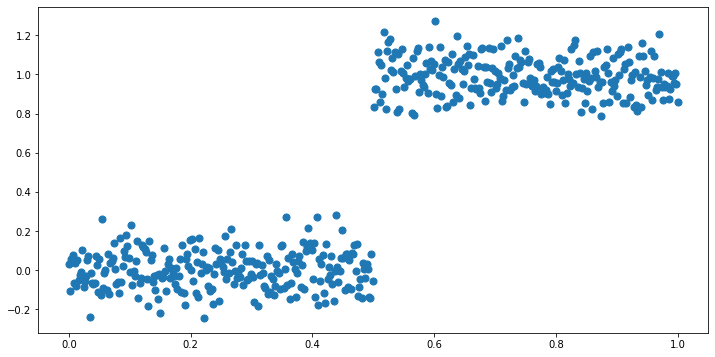

In [2]:
X_train = np.linspace(0, 1, 500)
X_test = np.linspace(0, 1, 1000)

@np.vectorize
def target(x):
    return x > 0.5

Y_train = target(X_train) + np.random.randn(*X_train.shape) * 0.1

plt.figure(figsize = (12, 6))
plt.scatter(X_train, Y_train, s=50)

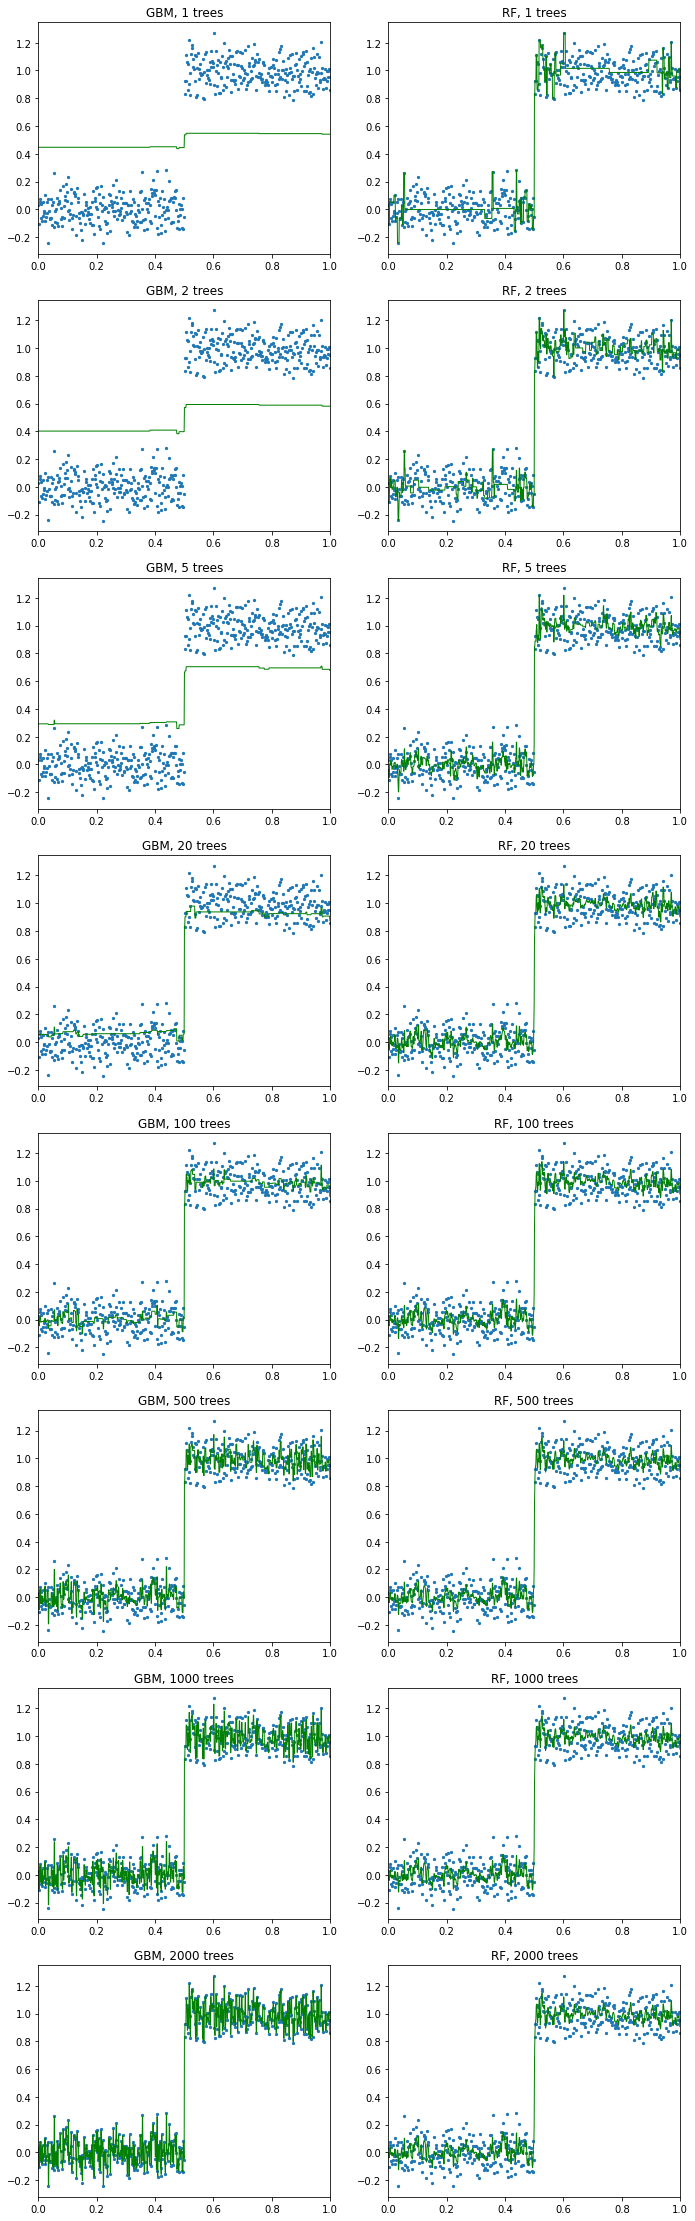

In [3]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(max_depth=10, warm_start=True)
gbm = GradientBoostingRegressor(warm_start=True)

X_train = X_train.reshape(-1, 1)
plt.figure(figsize=(11.5, 40))

sizes = [1, 2, 5, 20, 100, 500, 1000, 2000]
for i, s in enumerate(sizes):
    rf.n_estimators = s
    rf.fit(X_train, Y_train)
    
    gbm.n_estimators = s
    gbm.fit(X_train, Y_train)
    
    plt.subplot(8, 2, 2*i+1)
    plt.xlim([0, 1])
    plt.scatter(X_train, Y_train, s=5)
    plt.plot(X_test, gbm.predict(X_test.reshape(-1, 1)), c='green', linewidth=1)
    plt.title('GBM, {} trees'.format(s))
    
    plt.subplot(8, 2, 2*i+2)
    plt.xlim([0, 1])
    plt.scatter(X_train, Y_train, s=5)
    plt.plot(X_test, rf.predict(X_test.reshape(-1, 1)), c='green', linewidth=1)
    plt.title('RF, {} trees'.format(s))


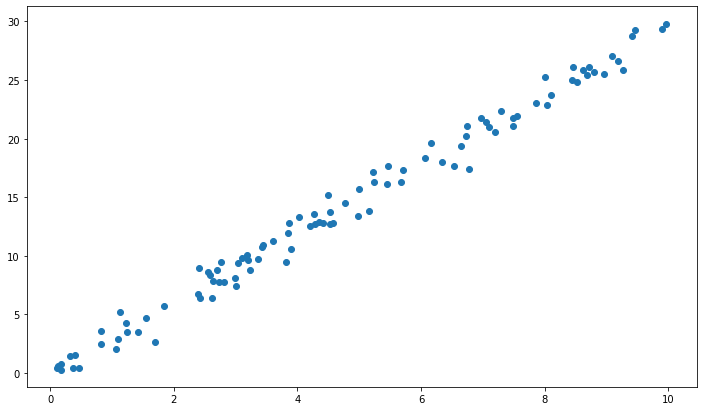

In [4]:
from numpy.random import rand, randn

set_size = 100
lin_coef = 3
sigma = 1

X_train = (rand(set_size) * 10).reshape(-1, 1) #вытягивает данные в строку
Y_train = X_train * lin_coef + sigma * randn(set_size).reshape(-1, 1)
plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, Y_train)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, Y_train.reshape(-1,))

GradientBoostingRegressor()

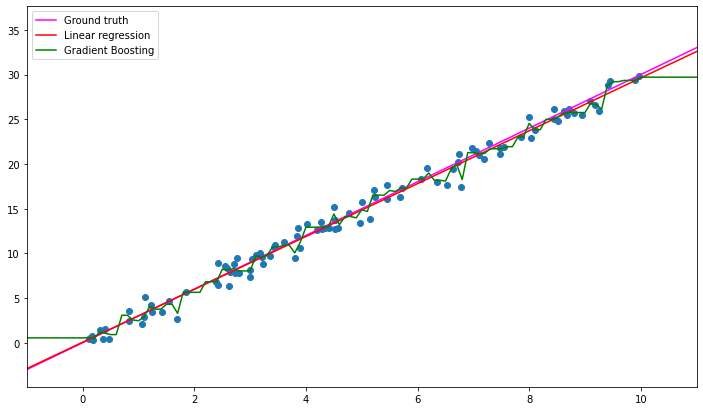

In [6]:
from numpy.random import rand, randn

grid = np.arange(-1, 12, 0.1).reshape(-1, 1)

plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train)
plt.plot(grid, lin_coef * grid, 'magenta')
plt.plot(grid, lr.predict(grid), 'red',)
plt.plot(grid, gbm.predict(grid), 'green')
plt.xlim([-1, 11])
plt.legend(['Ground truth', 'Linear regression', 'Gradient Boosting'], loc=0)

Возьмем объекты на большем отрезке

LR test MSE =  2.098856587836806
GBM test MSE =  2097.1285200031007


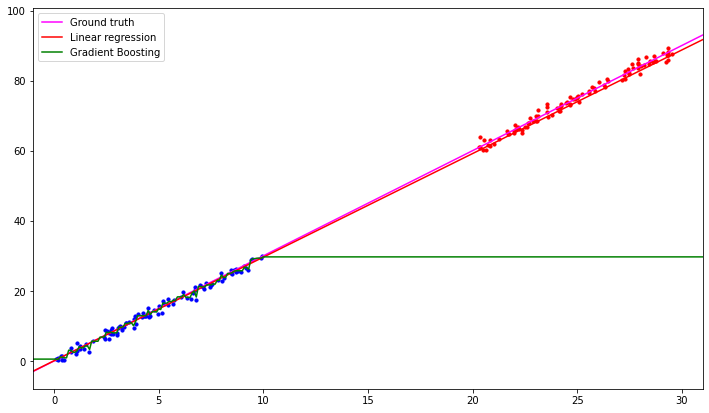

In [7]:
from numpy.random import rand, randn

grid = np.arange(-1, 32, 0.1).reshape(-1, 1)

X_test = (20 + rand(set_size) * 10).reshape(-1, 1)
Y_test = X_test * 3 + sigma * randn(set_size).reshape(-1, 1)
plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train, c='blue', s=10)
plt.scatter(X_test, Y_test, c='red', s=10)

plt.plot(grid, lin_coef * grid, 'magenta')
plt.plot(grid, lr.predict(grid), 'red')
plt.plot(grid, gbm.predict(grid), 'green')
plt.xlim([-1, 31])
plt.legend(['Ground truth', 'Linear regression', 'Gradient Boosting'], loc=0)
print ('LR test MSE = ', mean_squared_error(Y_test, lr.predict(X_test)))
print ('GBM test MSE = ', mean_squared_error(Y_test, gbm.predict(X_test)))

Дерево не знает о порогах <0 >10 при обучении и потому так оно выглядит

В некоторых случаях можно использовать нормализацию данных

XGBoost популярна и успешна в соревнованиях

LightGBM от микромягких быстрее работает за счет перебора значений по гистограмме, на каждом шаге строит вершину, дающую наибольшее уменьшение функционала ошибки, цепь с листами, несимметричное

CatBoost автоматически обрабатывает категориальные,симметричные с одним и тем же предикатом в каждой вершине, не слишком чувствительно к гиперпараметрам

Функционал в основном лог-лосс в классификации или мсе в регрессии, eta/learning_rate - скорость обучения (шаг), num_iter / n_est - число итер буст

Потестим lgmb и catboost

In [8]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_surface(X, y, clf):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.1, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

0.7366000000000001


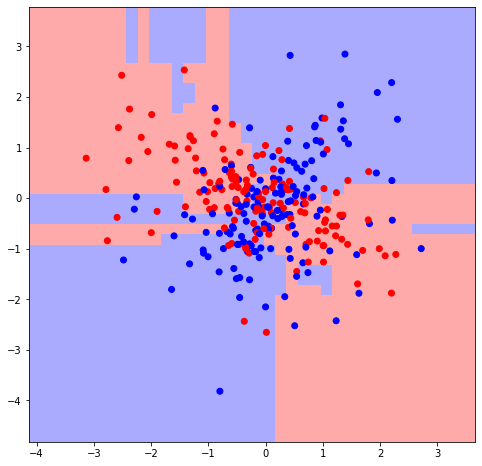

In [9]:
from catboost import CatBoostClassifier 

clf = CatBoostClassifier(iterations=300, logging_level='Silent')
clf.fit(X_train, y_train)
plot_surface(X_test, y_test, clf)

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

0.6976888888888888


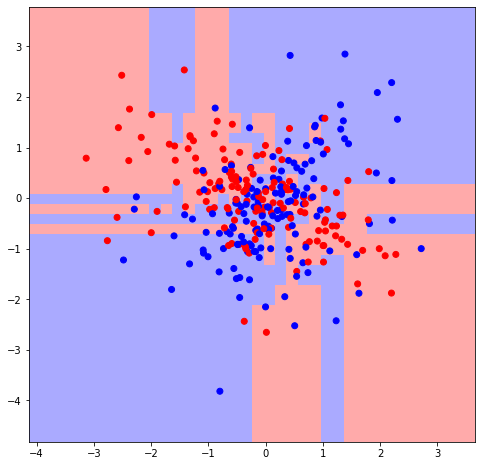

In [10]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=300)
clf.fit(X_train, y_train)
plot_surface(X_test, y_test, clf)

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

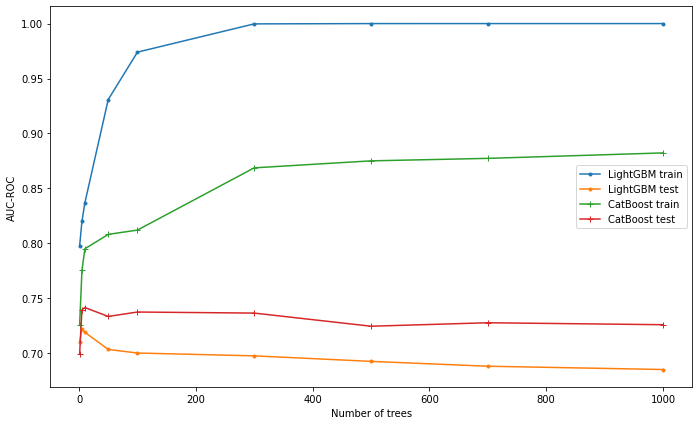

In [11]:
n_trees = [1, 5, 10, 50, 100, 300, 500, 700, 1000]
quals_train_lgb = []
quals_test_lgb = []
quals_train_cbm = []
quals_test_cbm = []

for n in n_trees:
    lgb = LGBMClassifier(n_estimators=n)
    lgb.fit(X_train, y_train)
    q_train_lgb = roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1])
    q_test_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])

    cbm = CatBoostClassifier(n_estimators=n, logging_level="Silent")
    cbm.fit(X_train, y_train)
    q_train_cbm = roc_auc_score(y_train, cbm.predict_proba(X_train)[:, 1])
    q_test_cbm = roc_auc_score(y_test, cbm.predict_proba(X_test)[:, 1])
    
    quals_train_lgb.append(q_train_lgb)
    quals_test_lgb.append(q_test_lgb)
    quals_train_cbm.append(q_train_cbm)
    quals_test_cbm.append(q_test_cbm)


plt.figure(figsize=(11.5, 7))
plt.plot(n_trees, quals_train_lgb, marker='.', label='LightGBM train')
plt.plot(n_trees, quals_test_lgb, marker='.', label='LightGBM test')
plt.plot(n_trees, quals_train_cbm, marker='+', label='CatBoost train')
plt.plot(n_trees, quals_test_cbm, marker='+', label='CatBoost test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

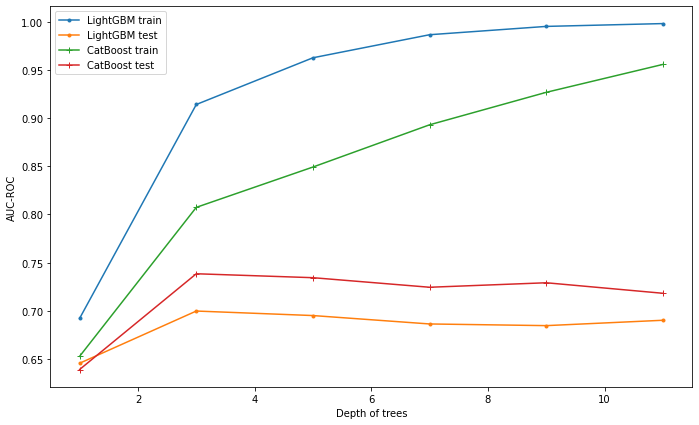

In [12]:
depth = list(range(1, 12, 2))
n_trees = 300
quals_train_lgb = []
quals_test_lgb = []
quals_train_cbm = []
quals_test_cbm = []

for d in depth:
    lgb = LGBMClassifier(n_estimators=n_trees, max_depth=d)
    lgb.fit(X_train, y_train)
    q_train_lgb = roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1])
    q_test_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])

    cbm = CatBoostClassifier(n_estimators=n_trees, max_depth=d, logging_level="Silent")
    cbm.fit(X_train, y_train)
    q_train_cbm = roc_auc_score(y_train, cbm.predict_proba(X_train)[:, 1])
    q_test_cbm = roc_auc_score(y_test, cbm.predict_proba(X_test)[:, 1])
    
    quals_train_lgb.append(q_train_lgb)
    quals_test_lgb.append(q_test_lgb)
    quals_train_cbm.append(q_train_cbm)
    quals_test_cbm.append(q_test_cbm)


plt.figure(figsize=(11.5, 7))
plt.plot(depth, quals_train_lgb, marker='.', label='LightGBM train')
plt.plot(depth, quals_test_lgb, marker='.', label='LightGBM test')
plt.plot(depth, quals_train_cbm, marker='+', label='CatBoost train')
plt.plot(depth, quals_test_cbm, marker='+', label='CatBoost test')
plt.xlabel('Depth of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

___________________________________________________________________________

Блендинг

 ___________________________________________________________________________

In [13]:
from sklearn.datasets import load_boston

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

C:\Games\Code\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :f

In [14]:
from catboost import CatBoostRegressor

cbm = CatBoostRegressor(iterations=100, max_depth=4, learning_rate=0.01, loss_function='RMSE', logging_level='Silent')
cbm.fit(X_train, y_train)

y_pred_cbm = cbm.predict(X_test)
y_train_pred_cbm = cbm.predict(X_train)

print(f"Train RMSE GB = {rmse(y_train, y_train_pred_cbm)}" ) #та же штука
print("Test RMSE GB = %.4f" % rmse(y_test, y_pred_cbm)) #но тут огр по знакам

Train RMSE GB = 5.443108537199976
Test RMSE GB = 6.5456


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_train_pred_lr = lr.predict(X_train_scaled)

print("Train RMSE LR = %.4f" % rmse(y_train, y_train_pred_lr))
print("Test RMSE LR = %.4f" % rmse(y_test, y_pred_lr))

Train RMSE LR = 4.4113
Test RMSE LR = 5.4154


Для простоты будем считать, что новый алгоритм $a(x)$ представим как
$$
    a(x)
    =
    \sum_{n = 1}^{N}
    w_n b_n(x),
$$
где $\sum_{n} w_n =1$ и $w_i \ge 0$

In [16]:
def select_weights(y_true, y_pred_1, y_pred_2):
    metric = []
    grid = np.linspace(0, 1, 1000)
    for w_0 in grid:
      w_1 = 1 - w_0
      y = y_pred_1 * w_0 + y_pred_2 * w_1

      metric.append([rmse(y_true, y), w_0, w_1])

    return metric

In [17]:
rmse_blending_train, w_0, w_1 = min(select_weights(y_train, y_train_pred_cbm, y_train_pred_lr), key=lambda x: x[0])

In [18]:
rmse_blending_train

4.273424051954004

In [20]:
w_0, w_1

(0.24524524524524524, 0.7547547547547547)

In [19]:
print("Test RMSE blending = %.4f" % rmse(y_test, y_pred_cbm * w_0 +  y_pred_lr * w_1))

Test RMSE blending = 5.2373
